<a href="https://colab.research.google.com/github/sophiawhe/data-visualization/blob/main/605_662DataVisualization_p4_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import pandas as pd
from os import path
from ipywidgets import widgets, interact, interactive, fixed

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataframe
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
# Looking at first 5 rows of the dataset
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))


There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [4]:
df[["country", "description","points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [5]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                       ... price               
                         count       mean       std  ...   50%    75%     max
country                                              ...                     
Argentina               3800.0  86.710263  3.179627  ...  17.0  25.00   230.0
Armenia                    2.0  87.500000  0.707107  ...  14.5  14.75    15.0
Australia               2329.0  88.580507  2.989900  ...  21.0  38.00   850.0
Austria                 3345.0  90.101345  2.499799  ...  25.0  36.50  1100.0
Bosnia and Herzegovina     2.0  86.500000  2.121320  ...  12.5  12.75    13.0

[5 rows x 16 columns]

In [6]:
country.mean().sort_values(by="points",ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


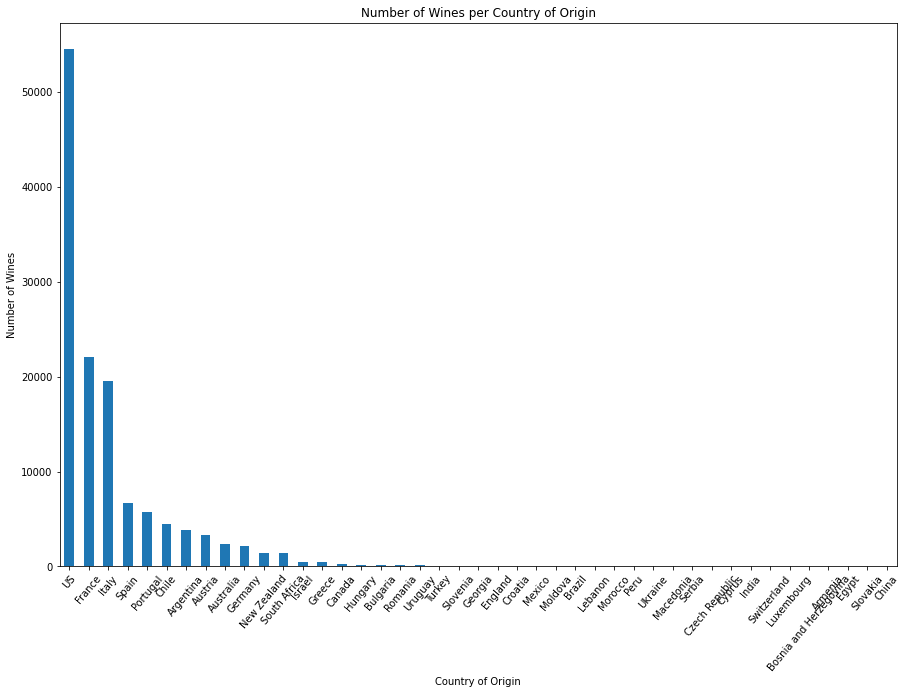

In [7]:
plt.figure(figsize=(15,10))
country.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.title("Number of Wines per Country of Origin")
plt.xlabel("Country of Origin")
plt.ylabel("Number of Wines")
plt.show()

In [8]:
def makeplot(maximum):
  plt.figure(figsize=(20,10))
  country.size().sort_values(ascending=False).head(maximum).plot.bar()
  plt.xticks(rotation=70)
  plt.title("Number of Wines per Country of Origin")
  plt.xlabel("Country of Origin")
  plt.ylabel("Number of Wines")
  # Save image
  plt.savefig("wines.png",bbox_inches = 'tight')
  plt.show()

interact(makeplot, df=fixed(df),maximum=[5,10,20,50])

interactive(children=(Dropdown(description='maximum', options=(5, 10, 20, 50), value=5), Output()), _dom_class…

<function __main__.makeplot>